<a href="https://colab.research.google.com/github/lakshika-wijesundara/Annomaly-detection-in-wearing-PPE/blob/main/PPE_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="##############")
project = rf.workspace("lakshika").project("ppe_annotation")
version = project.version(1)
dataset = version.download("yolov8-obb")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to PPE_Annotation-1 in yolov8-obb:: 100%|██████████| 3372/3372 [00:00<00:00, 3948.59it/s]


In [2]:
!pip install ultralytics
!pip install roboflow  # If downloading datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.2/910.2 kB 40.5 MB/s eta 0:00:00


In [3]:
from ultralytics import YOLO

# Verify the dataset
model = YOLO("yolov8n.yaml")
model.data = "/content/PPE_Annotation-1/data.yaml"
model.info()


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
YOLOv8n summary: 225 layers, 3,157,200 parameters, 3,157,184 gradients, 8.9 GFLOPs


(225, 3157200, 3157184, 8.8575488)

In [4]:
from ultralytics import YOLO

# Load YOLOv8 model
model = YOLO("yolov8n.pt")

# Train the model
model.train(
    data="/content/PPE_Annotation-1/data.yaml",
    epochs=50,  # Number of epochs
    imgsz=640,  # Image size
    batch=16,   # Batch size
    name="PPE-detection-training"
)



  0%|          | 29.6k/6.25M [00:00<00:00, 21.3MB/s]


Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/PPE_Annotation-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=PPE-detection-training, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, 

100%|██████████| 755k/755k [00:00<00:00, 140MB/s]


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 267MB/s]


AMP: checks passed ✅


train: Scanning /content/PPE_Annotation-1/train/labels... 1470 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1470/1470 [00:00<00:00, 1682.61it/s]


train: New cache created: /content/PPE_Annotation-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/PPE_Annotation-1/valid/labels... 140 images, 0 backgrounds, 0 corrupt: 100%|██████████| 140/140 [00:00<00:00, 692.85it/s]

val: New cache created: /content/PPE_Annotation-1/valid/labels.cache


Plotting labels to runs/detect/PPE-detection-training/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/PPE-detection-training
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.62G      1.895      3.245      1.465        176        640: 100%|██████████| 92/92 [00:52<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.72it/s]

                   all        140        956      0.436      0.311      0.339      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.46G      1.866      2.205      1.409        172        640: 100%|██████████| 92/92 [00:49<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.40it/s]

                   all        140        956      0.394      0.415      0.374      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.33G      1.873      2.084       1.42        142        640: 100%|██████████| 92/92 [00:48<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.55it/s]


                   all        140        956      0.562      0.402      0.395      0.219

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.54G      1.827      1.951      1.405        141        640: 100%|██████████| 92/92 [00:46<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.52it/s]

                   all        140        956      0.519      0.461      0.468      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.69G      1.829      1.866      1.379        133        640: 100%|██████████| 92/92 [00:47<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.22it/s]

                   all        140        956      0.557      0.499      0.506       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.75G      1.799      1.773       1.37         98        640: 100%|██████████| 92/92 [00:44<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]

                   all        140        956      0.609      0.502      0.526      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.86G      1.789      1.701      1.344        118        640: 100%|██████████| 92/92 [00:44<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.05it/s]

                   all        140        956      0.606      0.443      0.474      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.48G       1.77      1.666      1.351        129        640: 100%|██████████| 92/92 [00:45<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.60it/s]


                   all        140        956      0.661      0.504      0.564       0.31

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.49G      1.775      1.591      1.345        101        640: 100%|██████████| 92/92 [00:48<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.74it/s]

                   all        140        956      0.653      0.546      0.575      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.85G      1.748      1.551      1.327        153        640: 100%|██████████| 92/92 [00:47<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.41it/s]


                   all        140        956      0.634      0.538      0.575      0.314

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       2.7G      1.754      1.528      1.319        151        640: 100%|██████████| 92/92 [00:46<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.26it/s]


                   all        140        956      0.676      0.524      0.565       0.31

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.68G      1.746      1.505      1.321        129        640: 100%|██████████| 92/92 [00:48<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.66it/s]


                   all        140        956      0.615      0.536      0.551      0.297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.58G      1.708      1.443      1.308        131        640: 100%|██████████| 92/92 [00:51<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.32it/s]


                   all        140        956      0.678      0.601       0.63       0.35

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.54G      1.714      1.415      1.299        147        640: 100%|██████████| 92/92 [00:47<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.38it/s]

                   all        140        956      0.665      0.589      0.613      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.45G      1.705      1.413       1.29        168        640: 100%|██████████| 92/92 [00:49<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.65it/s]

                   all        140        956      0.687      0.566      0.613      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.39G      1.705      1.382      1.297        123        640: 100%|██████████| 92/92 [00:47<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.79it/s]


                   all        140        956      0.659      0.542      0.586      0.339

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.73G      1.683       1.35       1.28        137        640: 100%|██████████| 92/92 [00:48<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.93it/s]


                   all        140        956      0.643      0.588      0.604      0.349

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.42G      1.662      1.342      1.283        151        640: 100%|██████████| 92/92 [00:46<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.94it/s]


                   all        140        956       0.69      0.554      0.603       0.34

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.52G      1.633      1.284      1.255        146        640: 100%|██████████| 92/92 [00:46<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.33it/s]

                   all        140        956      0.701      0.586       0.63      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.48G      1.667      1.284      1.268        134        640: 100%|██████████| 92/92 [00:46<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]

                   all        140        956      0.644      0.601      0.627      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.44G      1.627      1.271      1.259         98        640: 100%|██████████| 92/92 [00:45<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]

                   all        140        956      0.698      0.568      0.615      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.49G      1.621      1.237      1.246        139        640: 100%|██████████| 92/92 [00:44<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.27it/s]

                   all        140        956      0.667       0.57      0.609      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.52G      1.613      1.224      1.241        174        640: 100%|██████████| 92/92 [00:46<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.50it/s]


                   all        140        956      0.676      0.573      0.625      0.361

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.66G       1.61      1.205      1.238        132        640: 100%|██████████| 92/92 [00:48<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.58it/s]

                   all        140        956      0.693      0.595      0.641       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.37G      1.585      1.175       1.23        132        640: 100%|██████████| 92/92 [00:48<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.35it/s]

                   all        140        956       0.71      0.592      0.643      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.52G      1.595      1.178      1.222        126        640: 100%|██████████| 92/92 [00:48<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.38it/s]

                   all        140        956       0.71       0.57      0.618      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50       2.6G      1.588      1.176      1.225        158        640: 100%|██████████| 92/92 [00:47<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.13it/s]

                   all        140        956      0.763      0.567       0.64      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.31G      1.566       1.13      1.215        130        640: 100%|██████████| 92/92 [00:45<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.55it/s]

                   all        140        956      0.662      0.602      0.633      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.51G      1.545      1.124      1.211        167        640: 100%|██████████| 92/92 [00:44<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.74it/s]

                   all        140        956      0.691       0.61      0.658      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.56G      1.542      1.107      1.215        129        640: 100%|██████████| 92/92 [00:44<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.26it/s]

                   all        140        956      0.725       0.59      0.635      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.57G      1.549      1.105      1.206        140        640: 100%|██████████| 92/92 [00:46<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.38it/s]

                   all        140        956      0.735      0.576      0.636      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.51G      1.546      1.093      1.206        146        640: 100%|██████████| 92/92 [00:47<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.77it/s]


                   all        140        956      0.712      0.609      0.644      0.372

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       2.6G       1.52      1.084      1.189        170        640: 100%|██████████| 92/92 [00:48<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.81it/s]


                   all        140        956       0.71      0.598      0.642      0.374

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.65G      1.526      1.075      1.194        136        640: 100%|██████████| 92/92 [00:46<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.21it/s]

                   all        140        956      0.668      0.631      0.647      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.37G      1.522      1.061      1.189        170        640: 100%|██████████| 92/92 [00:45<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]

                   all        140        956       0.71      0.618      0.645      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50       2.9G      1.518      1.052      1.192        139        640: 100%|██████████| 92/92 [00:44<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.47it/s]

                   all        140        956      0.723      0.584      0.633      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.32G      1.487      1.014      1.182        133        640: 100%|██████████| 92/92 [00:45<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.50it/s]

                   all        140        956      0.734      0.605      0.657      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.68G      1.511      1.021      1.185        146        640: 100%|██████████| 92/92 [00:46<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.51it/s]


                   all        140        956      0.695      0.605      0.648      0.379

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.56G      1.475     0.9914      1.166        162        640: 100%|██████████| 92/92 [00:47<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.52it/s]

                   all        140        956      0.701       0.63      0.661      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.24G      1.472     0.9999      1.166        155        640: 100%|██████████| 92/92 [00:46<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.35it/s]


                   all        140        956      0.697       0.64      0.662      0.386
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.38G      1.447     0.9178      1.162        145        640: 100%|██████████| 92/92 [00:31<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.03it/s]

                   all        140        956      0.717      0.616       0.66       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.49G      1.447     0.9127      1.167         86        640: 100%|██████████| 92/92 [00:30<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.42it/s]

                   all        140        956      0.728      0.601      0.657      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.49G      1.425      0.881      1.148        104        640: 100%|██████████| 92/92 [00:29<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.88it/s]

                   all        140        956       0.71      0.615      0.656      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.34G       1.41     0.8735      1.142         72        640: 100%|██████████| 92/92 [00:28<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.08it/s]

                   all        140        956      0.706      0.627      0.652      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.42G      1.413     0.8597      1.138         91        640: 100%|██████████| 92/92 [00:28<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.36it/s]

                   all        140        956      0.727      0.613      0.656      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.32G      1.385     0.8507      1.131         67        640: 100%|██████████| 92/92 [00:30<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.38it/s]


                   all        140        956      0.725      0.631      0.671      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.49G      1.389     0.8352      1.131         79        640: 100%|██████████| 92/92 [00:31<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.42it/s]

                   all        140        956      0.721      0.617      0.653      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.46G      1.377     0.8275      1.125        105        640: 100%|██████████| 92/92 [00:32<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.19it/s]

                   all        140        956       0.72      0.627      0.665      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.47G      1.371     0.8151      1.128         77        640: 100%|██████████| 92/92 [00:32<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.49it/s]

                   all        140        956      0.743      0.623      0.667      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.36G      1.351     0.8094      1.114         98        640: 100%|██████████| 92/92 [00:30<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.44it/s]

                   all        140        956      0.754      0.629       0.67      0.387



50 epochs completed in 0.653 hours.
Optimizer stripped from runs/detect/PPE-detection-training/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/PPE-detection-training/weights/best.pt, 6.3MB

Validating runs/detect/PPE-detection-training/weights/best.pt...
Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.47it/s]


                   all        140        956      0.753      0.629      0.669      0.386
                 boots         73        196      0.694      0.571      0.605      0.327
                helmet         77        166      0.861      0.785      0.838      0.608
              no boots         49        128      0.628      0.281      0.333      0.126
             no helmet         76        161      0.749      0.578      0.586      0.211
               no vest         72        172       0.75      0.703      0.738      0.372
                  vest         71        133      0.838      0.854      0.913      0.675
Speed: 0.4ms preprocess, 2.9ms inference, 0.0ms loss, 5.7ms postprocess per image
Results saved to runs/detect/PPE-detection-training


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c2a9653a810>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

In [5]:
from ultralytics import YOLO

# Load the trained model
model = YOLO("/content/yolov8n.pt")

# Evaluate the model
metrics = model.val(data="/content/PPE_Annotation-1/data.yaml")

print(metrics)  # View a high-level summary of the object
print(dir(metrics))  # List all properties and methods of the metrics object
print(metrics.box)  # Inspect the box attribute specifically




Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs


val: Scanning /content/PPE_Annotation-1/valid/labels.cache... 140 images, 0 backgrounds, 0 corrupt: 100%|██████████| 140/140 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.74it/s]


                   all        140        956    0.00114    0.00189   0.000581   0.000576
                person         73        196   0.000189     0.0051   9.53e-05   6.67e-05
               bicycle         77        166          0          0          0          0
                   car         49        128          0          0          0          0
            motorcycle         76        161    0.00662    0.00621    0.00339    0.00339
              airplane         72        172          0          0          0          0
                   bus         71        133          0          0          0          0
Speed: 0.5ms preprocess, 6.6ms inference, 0.0ms loss, 5.5ms postprocess per image
Results saved to runs/detect/val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c2a96e95d90>
curves: ['Precision-Recall

In [6]:
import os

# Define the root directory for training runs
root_dir = "runs/detect"

# Iterate through all folders in the directory
for dirpath, dirnames, filenames in os.walk(root_dir):
    if "results.csv" in filenames:
        print(f"Found results.csv in: {os.path.join(dirpath, 'results.csv')}")


Found results.csv in: runs/detect/PPE-detection-training/results.csv


In [7]:
import pandas as pd

# Path to the results.csv file
results_path = "/content/runs/detect/PPE-detection-training/results.csv"

# Load the CSV into a DataFrame
results = pd.read_csv(results_path)

# Display the first few rows and column names to understand the structure
print(results.head())
print(results.columns)


   epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1   59.1875         1.89463         3.24542         1.46481   
1      2  111.3590         1.86637         2.20507         1.40934   
2      3  163.0080         1.87256         2.08388         1.42020   
3      4  212.7020         1.82710         1.95092         1.40520   
4      5  263.7100         1.82897         1.86603         1.37867   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.43569            0.31059           0.33917   
1               0.39413            0.41503           0.37394   
2               0.56242            0.40193           0.39510   
3               0.51920            0.46057           0.46807   
4               0.55655            0.49913           0.50639   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.17457       1.76256       2.40793       1.35164  0.000330   
1              0.20935       1.67030  

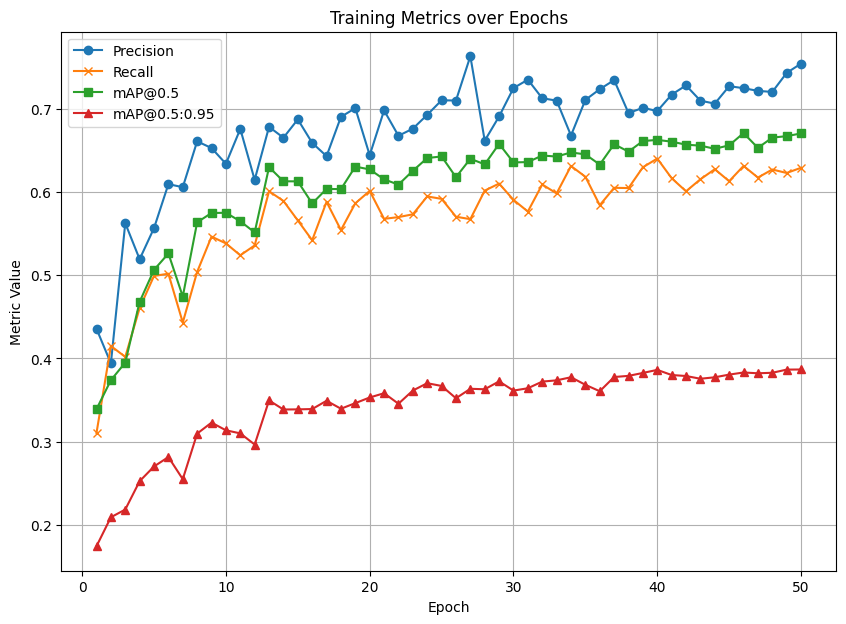

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(10, 7))
plt.plot(results['epoch'], results['metrics/precision(B)'], label="Precision", marker='o')
plt.plot(results['epoch'], results['metrics/recall(B)'], label="Recall", marker='x')
plt.plot(results['epoch'], results['metrics/mAP50(B)'], label="mAP@0.5", marker='s')
plt.plot(results['epoch'], results['metrics/mAP50-95(B)'], label="mAP@0.5:0.95", marker='^')
plt.title("Training Metrics over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Metric Value")
plt.legend()
plt.grid()
plt.show()


In [10]:
from ultralytics import YOLO

# Load the fine-tuned model
fine_tuned_model_path = "/content/runs/detect/PPE-detection-training/weights/best.pt"
model = YOLO(fine_tuned_model_path)

# Evaluate the model on the validation set
results = model.val(
    data="/content/PPE_Annotation-1/data.yaml",  # Path to the dataset YAML file
    imgsz=640,                                         # Image size (default: 640)
    batch=16                                           # Batch size
)

# Print high-level evaluation metrics
print("\n--- Model Performance ---")
print(f"Precision: {results.box.mean_results()[0]:.4f}")
print(f"Recall: {results.box.mean_results()[1]:.4f}")
print(f"mAP@0.5: {results.box.mean_results()[2]:.4f}")
print(f"mAP@0.5:0.95: {results.box.mean_results()[3]:.4f}")


Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/PPE_Annotation-1/valid/labels.cache... 140 images, 0 backgrounds, 0 corrupt: 100%|██████████| 140/140 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.62it/s]


                   all        140        956      0.754      0.629      0.669      0.386
                 boots         73        196      0.693      0.576      0.605      0.328
                helmet         77        166      0.867      0.787       0.84      0.603
              no boots         49        128      0.624      0.281      0.331      0.125
             no helmet         76        161      0.755      0.578      0.587      0.211
               no vest         72        172      0.743      0.698      0.737      0.372
                  vest         71        133      0.844      0.857      0.914      0.677
Speed: 0.6ms preprocess, 5.0ms inference, 0.0ms loss, 4.2ms postprocess per image
Results saved to runs/detect/val2

--- Model Performance ---
Precision: 0.7545
Recall: 0.6295
mAP@0.5: 0.6692
mAP@0.5:0.95: 0.3860
